In [1]:
from tensorly.metrics.regression import RMSE
import time
import scipy.io
import tensorly as tl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tensorly.cp_tensor import CPTensor
from nn_hals_parafac_normalization_comparison import *
#tensor
array=np.random.rand(30, 40, 20)
tensor=tl.tensor(array,dtype='float32')

#parameters
init='svd'
svd='numpy_svd'
rank=10

1. Method from PR
2. Inner loop normalization with last factor normalization after inner loop
3. Normalization at the end
4. 2 and 3 together

In [2]:
#normalized improved nonnegative parafac hals result
tic = time.time()
tensornorm1, errorsnorm1, weights_iter1 = nn_hals_normalize1(tensor, rank=rank, init=init, normalize_factors=True, return_errors=True, n_iter_max=100)
weightsnorm1, factorsnorm1 = tensornorm1
cp_reconstructionnorm1 = tl.cp_to_tensor((weightsnorm1, factorsnorm1))
time_cp1 = time.time()-tic

#normalized improved nonnegative parafac hals result
tic = time.time()
tensornorm2, errorsnorm2, weights_iter2 = nn_hals_normalize2(tensor, rank=rank, init=init, normalize_factors=True, return_errors=True, n_iter_max=100)
weightsnorm2, factorsnorm2 = tensornorm2
cp_reconstructionnorm2 = tl.cp_to_tensor((weightsnorm2, factorsnorm2))
time_cp2 = time.time()-tic

#normalized improved nonnegative parafac hals result
tic = time.time()
tensornorm3, errorsnorm3, weights_iter3 = nn_hals_normalize3(tensor, rank=rank, init=init, normalize_factors=True, return_errors=True, n_iter_max=100)
weightsnorm3, factorsnorm3 = tensornorm3
cp_reconstructionnorm3 = tl.cp_to_tensor((weightsnorm3, factorsnorm3))
time_cp3 = time.time()-tic

#normalized improved nonnegative parafac hals result
tic = time.time()
tensornorm4, errorsnorm4, weights_iter4 = nn_hals_normalize4(tensor, rank=rank, init=init, normalize_factors=True, return_errors=True, n_iter_max=100)
weightsnorm4, factorsnorm4 = tensornorm4
cp_reconstructionnorm4 = tl.cp_to_tensor((weightsnorm4, factorsnorm4))
time_cp4 = time.time()-tic

# Error per iteration 

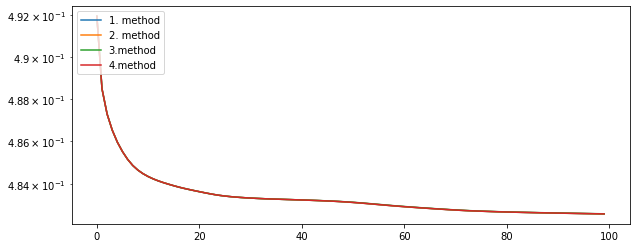

In [3]:
each_iteration(errorsnorm1, errorsnorm2, errorsnorm3, errorsnorm4)

# Weights per iteration 

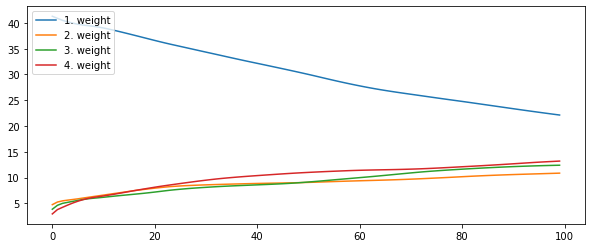

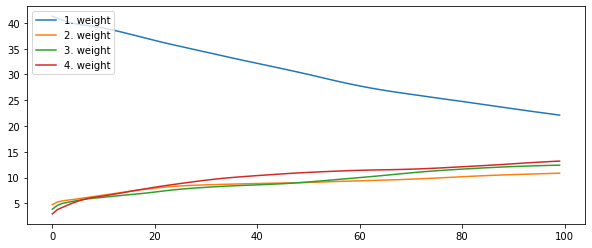

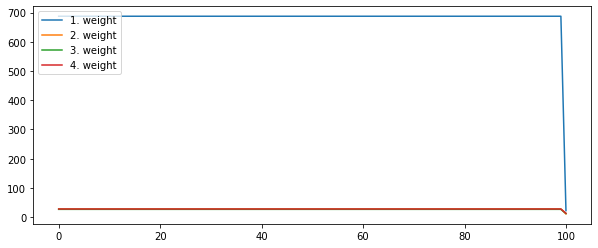

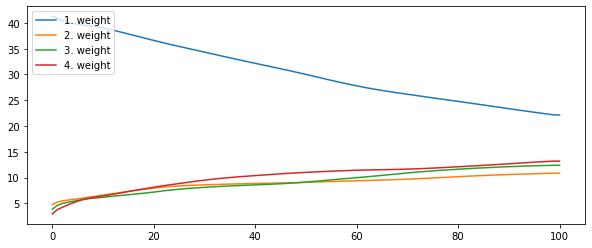

In [4]:
plot_weights(weights_iter1)
plot_weights(weights_iter2)
plot_weights(weights_iter3)
plot_weights(weights_iter4)

# Last weights

In [5]:
print(weightsnorm1[:5])
print(weightsnorm2[:5])
print(weightsnorm3[:5])
print(weightsnorm4[:5])

[22.136702  10.862462  12.400385  13.201884   7.8053427]
[22.123928 10.85855  12.410701 13.205305  7.808883]
[22.200459  10.871125  12.3432455 13.183526   7.7906613]
[22.15164   10.865053  12.38876   13.198207   7.8013487]


# Mean of factors

In [6]:
print(tl.mean(factorsnorm1[0]), tl.mean(factorsnorm1[1]), tl.mean(factorsnorm1[2]))
print(tl.mean(factorsnorm2[0]), tl.mean(factorsnorm2[1]), tl.mean(factorsnorm2[2]))
print(tl.mean(factorsnorm3[0]), tl.mean(factorsnorm3[1]), tl.mean(factorsnorm3[2]))
print(tl.mean(factorsnorm4[0]), tl.mean(factorsnorm4[1]), tl.mean(factorsnorm4[2]))

0.15551642 0.13375573 0.18532193
0.15550965 0.13374513 0.18531978
0.15553531 0.13380098 0.18534778
0.15552133 0.13376571 0.18532303


In [7]:
print(RMSE(tensor,cp_reconstructionnorm1))
print(RMSE(tensor,cp_reconstructionnorm2))
print(RMSE(tensor,cp_reconstructionnorm3))
print(RMSE(tensor,cp_reconstructionnorm4))

0.2782007
0.27820012
0.27820325
0.27820125


In [8]:
print(str(time_cp1))
print(str(time_cp2))
print(str(time_cp3))
print(str(time_cp4))

0.7820830345153809
1.0556507110595703
0.7450668811798096
0.8274261951446533
